In [1]:
import cvxpy as cp
import numpy as np
import plotly.graph_objects as go


In [5]:
path = "./graphs/graph_01.txt"
coordinates = []
connectors = []
fixed = []
flag = None
with open(path, "r") as f:
    for line in f:
        line = line.strip()
        if line == "a" or line == "b" or line == "c":
            flag = line
            continue

        if flag == "a":
            coordinates.append(list(map(float, line.split())))
        elif flag == "b":
            connectors.append(list(map(int, line.split())))
        else:
            fixed.append(int(line))

print(coordinates)
print(connectors)
print(fixed)


[[1.0, 1.0], [2.0, 1.0], [2.0, 2.0], [3.0, 2.0], [3.0, 3.0], [3.0, 4.0], [4.0, 3.0], [4.0, 5.0], [5.0, 5.0]]
[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [4, 6], [6, 7], [7, 8]]
[0, 1, 1, 1, 0, 1, 1, 1, 0]


In [3]:
fixed_coordinates = []
for i, elem in enumerate(fixed):
    if elem == 0:
        fixed_coordinates.append(coordinates[i])


In [13]:
paths = []
path = []

for i, elem in enumerate(connectors[1:]):
    if elem[0] == connectors[i][1]:
        path.append(connectors[i])
        print(connectors[i])
    else:
        paths.append(path)
        path = []

print(paths)


[0, 1]
[1, 2]
[2, 3]
[3, 4]
[4, 6]
[6, 7]
[[[0, 1], [1, 2], [2, 3], [3, 4]]]


In [6]:
# Define the original path as a set of points
path = np.array([[1, 1], [2, 1], [2, 2], [3, 2], [3, 3], [4, 3], [4, 5], [5, 5]])

# Define the starting and ending points
start_point = path[0]
end_point = path[-1]

# Define the variables for the optimized path
n_points = len(path)
opt_path = cp.Variable((n_points, 2))

# Define the regularization parameter
alpha = 0.5

# Define the objective function to minimize the curvature and distance
obj = cp.sum_squares(
    opt_path[1:-1, :] - 0.5 * (opt_path[0:-2, :] + opt_path[2:, :])
) + alpha * cp.sum_squares(opt_path - path)

# Define the constraints to ensure the optimized path passes through the starting and ending points
constraints = [opt_path[0, :] == start_point, opt_path[-1, :] == end_point]

# Solve the optimization problem
prob = cp.Problem(cp.Minimize(obj), constraints)
prob.solve()

# Get the optimized path
opt_path = opt_path.value

# Plot the original and optimized paths using plotly
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=path[:, 0], y=path[:, 1], mode="lines", name="Original Path")
)
fig.add_trace(
    go.Scatter(x=opt_path[:, 0], y=opt_path[:, 1], mode="lines", name="Optimized Path")
)
fig.show()


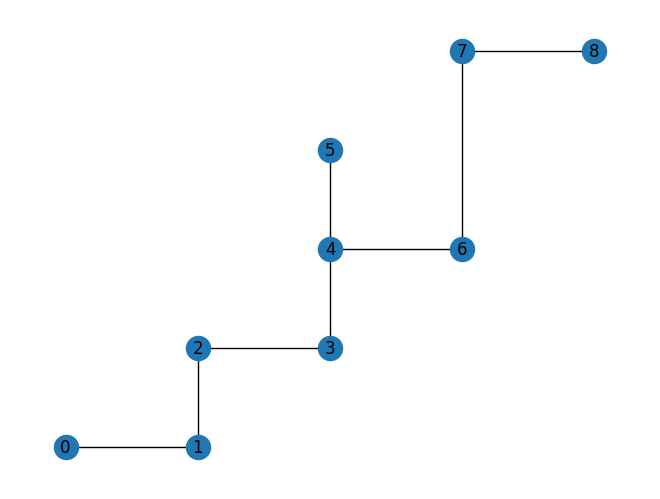

In [55]:
import networkx as nx

G = nx.Graph()

G.add_node(0, pos=(1.0, 1.0))
G.add_node(1, pos=(2.0, 1.0))
G.add_node(2, pos=(2.0, 2.0))
G.add_node(3, pos=(3.0, 2.0))
G.add_node(4, pos=(3.0, 3.0))
G.add_node(5, pos=(3.0, 4.0))
G.add_node(6, pos=(4.0, 3.0))
G.add_node(7, pos=(4.0, 5.0))
G.add_node(8, pos=(5.0, 5.0))

G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)
G.add_edge(4, 6)
G.add_edge(6, 7)
G.add_edge(7, 8)

nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True)


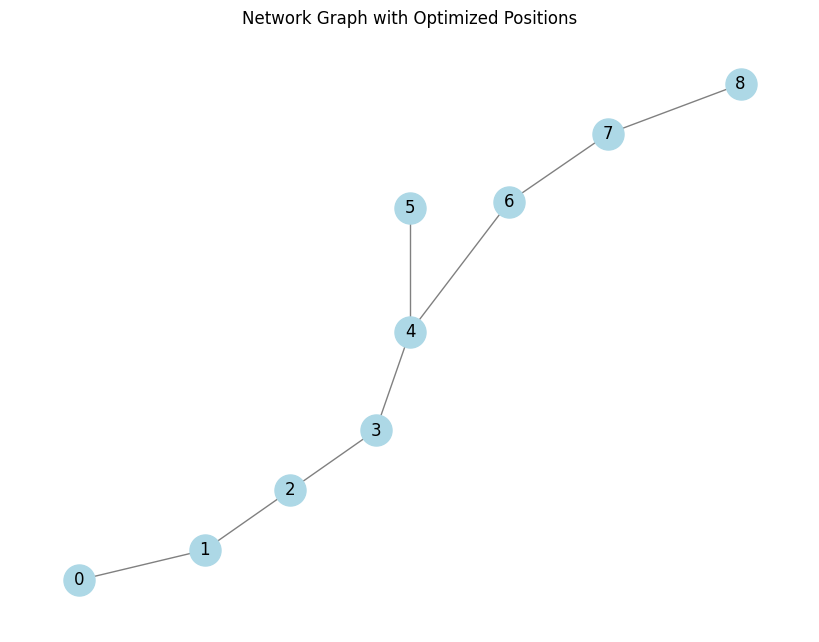

In [56]:
import networkx as nx
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Define the regularization parameter
alpha = 0.5

# Create the networkx graph
G = nx.Graph()

G.add_node(0, pos=(1.0, 1.0))
G.add_node(1, pos=(2.0, 1.0))
G.add_node(2, pos=(2.0, 2.0))
G.add_node(3, pos=(3.0, 2.0))
G.add_node(4, pos=(3.0, 3.0))
G.add_node(5, pos=(3.0, 4.0))
G.add_node(6, pos=(4.0, 3.0))
G.add_node(7, pos=(4.0, 5.0))
G.add_node(8, pos=(5.0, 5.0))

G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)
G.add_edge(4, 6)
G.add_edge(6, 7)
G.add_edge(7, 8)

pos = nx.get_node_attributes(G, 'pos')
num_nodes = len(pos)

# Create the optimization variables
opt_path = cp.Variable((num_nodes, 2))

# Define the objective function to minimize the curvature and distance
obj = cp.sum_squares(
    opt_path[1:-1, :] - 0.5 * (opt_path[0:-2, :] + opt_path[2:, :])
) + alpha * cp.sum_squares(opt_path - np.array(list(pos.values())))

# Define the constraints for fixed nodes
constraints = []
for node, position in pos.items():
    if len(list(G.neighbors(node))) != 2:
        constraints.append(opt_path[node, :] == np.array(position))

# Create the optimization problem
problem = cp.Problem(cp.Minimize(obj), constraints)

# Solve the problem
problem.solve()

# Retrieve the optimized path
optimized_pos = {node: tuple(opt_path[node, :].value) for node in G.nodes()}

# Draw the graph with optimized positions
plt.figure(figsize=(8, 6))
nx.draw(G, pos=optimized_pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray')
plt.title("Network Graph with Optimized Positions")
plt.show()


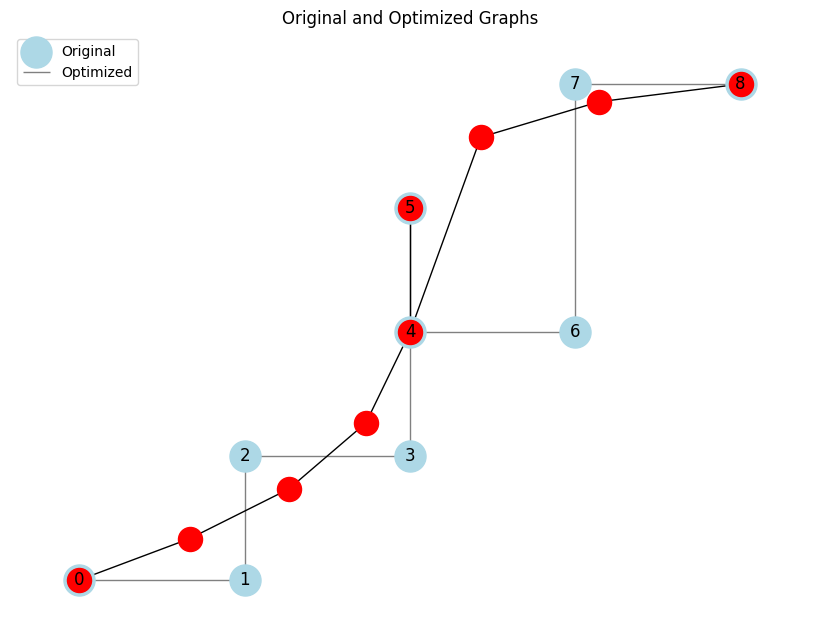

In [103]:
import networkx as nx
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Create the networkx graph
G = nx.Graph()

G.add_node(0, pos=(1.0, 1.0))
G.add_node(1, pos=(2.0, 1.0))
G.add_node(2, pos=(2.0, 2.0))
G.add_node(3, pos=(3.0, 2.0))
G.add_node(4, pos=(3.0, 3.0))
G.add_node(5, pos=(3.0, 4.0))
G.add_node(6, pos=(4.0, 3.0))
G.add_node(7, pos=(4.0, 5.0))
G.add_node(8, pos=(5.0, 5.0))

G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)
G.add_edge(4, 6)
G.add_edge(6, 7)
G.add_edge(7, 8)

pos = nx.get_node_attributes(G, 'pos')
num_nodes = len(pos)

# Create the optimization variables
opt_path = cp.Variable((num_nodes, 2))

# Define the regularization parameter
alpha = 0

# Define the objective function to minimize the curvature and distance
obj = cp.sum_squares(
    opt_path[1:-1, :] - 0.5 * (opt_path[0:-2, :] + opt_path[2:, :])
) + alpha * cp.sum_squares(opt_path - np.array(list(pos.values())))

# Define the constraints for fixed nodes
constraints = []
for node, position in pos.items():
    if len(list(G.neighbors(node))) != 2:
        constraints.append(opt_path[node, :] == np.array(position))

# Create the optimization problem
problem = cp.Problem(cp.Minimize(obj), constraints)

# Solve the problem
problem.solve()

# Retrieve the optimized path
optimized_pos = {node: tuple(opt_path[node, :].value) for node in G.nodes()}

# Draw the original and optimized graphs together
plt.figure(figsize=(8, 6))

# Draw the original graph
nx.draw(G, pos=pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray')

# Draw the optimized graph
nx.draw(G, pos=optimized_pos, with_labels=False, node_size=300, node_color='red', edge_color='black')

plt.title("Original and Optimized Graphs")
plt.legend(['Original', 'Optimized'])
plt.show()


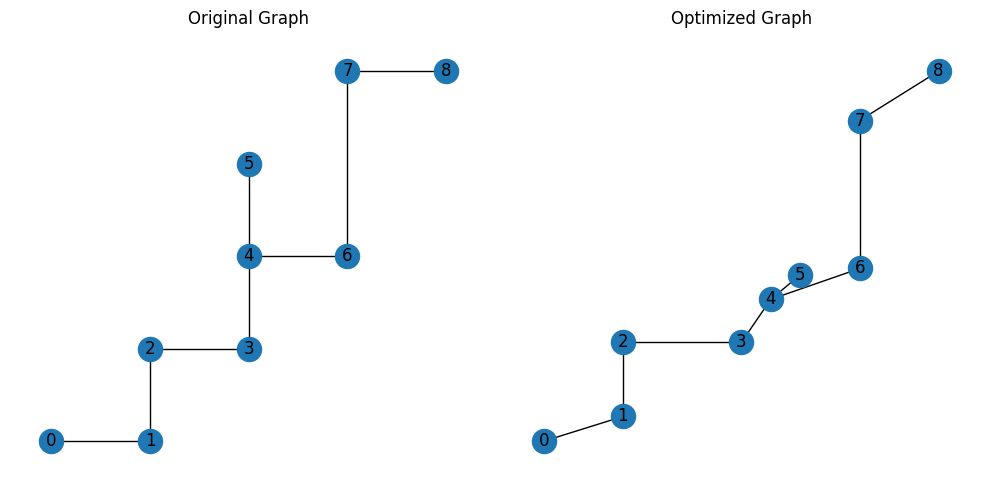

In [89]:
import networkx as nx
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Create the graph
G = nx.Graph()
G.add_node(0, pos=(1.0, 1.0))
G.add_node(1, pos=(2.0, 1.0))
G.add_node(2, pos=(2.0, 2.0))
G.add_node(3, pos=(3.0, 2.0))
G.add_node(4, pos=(3.0, 3.0))
G.add_node(5, pos=(3.0, 4.0))
G.add_node(6, pos=(4.0, 3.0))
G.add_node(7, pos=(4.0, 5.0))
G.add_node(8, pos=(5.0, 5.0))
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)
G.add_edge(4, 6)
G.add_edge(6, 7)
G.add_edge(7, 8)

# Get the node positions
pos = nx.get_node_attributes(G, 'pos')

# Get the number of nodes and edges
n = G.number_of_nodes()
m = G.number_of_edges()

# Get the adjacency matrix
A = nx.adjacency_matrix(G).todense()

# Flatten the node positions
X = np.array(list(pos.values()))

# Define the optimization variables
opt_X = cp.Variable((n, 2))

# Define the regularization parameter
alpha = 0.5

# Define the objective function to minimize the curvature and distance
obj = cp.sum_squares(
    opt_X[1:-1, :] - 0.5 * (opt_X[0:-2, :] + opt_X[2:, :])
) + alpha * cp.sum_squares(opt_X - X)

# Define the constraints
constraints = [opt_X[i, :] == X[i, :] for i in range(n) if G.degree[i] == 2]

# Define the problem
problem = cp.Problem(cp.Minimize(obj), constraints)

# Solve the problem
problem.solve()

# Get the optimized node positions
optimized_pos = {i: tuple(opt_X[i, :].value) for i in range(n)}

# Draw the original and optimized graphs
plt.figure(figsize=(10, 5))
plt.subplot(121)
nx.draw(G, pos, with_labels=True)
plt.title('Original Graph')
plt.subplot(122)
nx.draw(G, optimized_pos, with_labels=True)
plt.title('Optimized Graph')
plt.tight_layout()
plt.show()


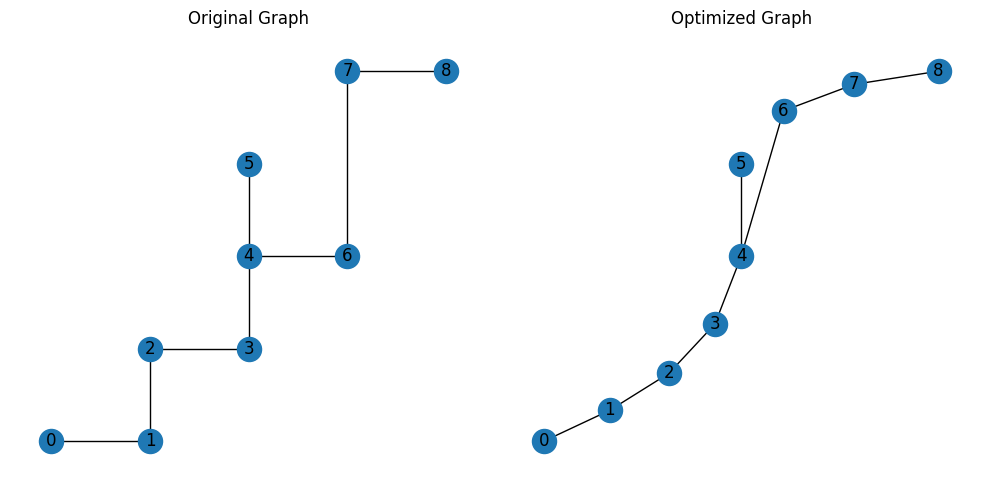

In [81]:
import networkx as nx
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Create the graph
G = nx.Graph()
G.add_node(0, pos=(1.0, 1.0))
G.add_node(1, pos=(2.0, 1.0))
G.add_node(2, pos=(2.0, 2.0))
G.add_node(3, pos=(3.0, 2.0))
G.add_node(4, pos=(3.0, 3.0))
G.add_node(5, pos=(3.0, 4.0))
G.add_node(6, pos=(4.0, 3.0))
G.add_node(7, pos=(4.0, 5.0))
G.add_node(8, pos=(5.0, 5.0))
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)
G.add_edge(4, 6)
G.add_edge(6, 7)
G.add_edge(7, 8)

# Get the node positions
pos = nx.get_node_attributes(G, 'pos')

# Get the number of nodes and edges
n = G.number_of_nodes()
m = G.number_of_edges()

# Get the adjacency matrix
A = nx.adjacency_matrix(G).todense()

# Flatten the node positions
X = np.array(list(pos.values()))

# Define the optimization variables
opt_X = cp.Variable((n, 2))

# Define the regularization parameter
alpha = 0

# Define the objective function to minimize the curvature and distance
obj = cp.sum_squares(
    opt_X[1:-1, :] - 0.5 * (opt_X[0:-2, :] + opt_X[2:, :])
) + alpha * cp.sum_squares(opt_X - X)

# Define the constraints
constraints = [
    opt_X[i, :] == X[i, :]
    for i in range(n)
    if G.degree[i] == 1 or i in [0, 4, 5, 8]
]

# Define the problem
problem = cp.Problem(cp.Minimize(obj), constraints)

# Solve the problem
problem.solve()

# Get the optimized node positions
optimized_pos = {i: tuple(opt_X[i, :].value) for i in range(n)}

# Draw the original and optimized graphs
plt.figure(figsize=(10, 5))
plt.subplot(121)
nx.draw(G, pos, with_labels=True)
plt.title('Original Graph')
plt.subplot(122)
nx.draw(G, optimized_pos, with_labels=True)
plt.title('Optimized Graph')
plt.tight_layout()
plt.show()
